In [25]:
!pip install kafka-python

In [26]:
#Importando as bibliotecas
from kafka import KafkaConsumer
import json
from json import loads
import pandas as pd
from pandas.io.json import json_normalize

In [27]:
#Consuma todas as mensagens do tópico, mas não marque como 'lidas' (enable_auto_commit=False)
#para que possamos relê-los quantas vezes quisermos.
consumer = KafkaConsumer('Vendasglobais2',
                         group_id = 'Vendas2-consumer-group',
                         bootstrap_servers=['localhost:9092'],
                         value_deserializer=lambda m: json.loads(m.decode('utf-8')),
                         auto_offset_reset ='earliest',
                         enable_auto_commit=False,
                         consumer_timeout_ms = 1000
                         )

In [3]:
#Visualizar os dados do consumer
for message in consumer:
    print("Topic: ", message.topic)
    print("Partição: ", message.partition)
    print("Chave: ", message.key)
    print("Offset: ", message.offset)
    print("Mensagem: ", message.value)
    print("------------------------")

In [4]:
#Idenficando o tipo de objeto
print(type(message.value))

NameError: name 'message' is not defined

In [ ]:
#Visualizando a normalizção do json
data = pd.json_normalize(message.value)
data

In [28]:
#Concatenar todas as linhas, normalizando o json
lista = []

for message in consumer:
    global combined
    data = pd.json_normalize(message.value)
    lista.append(data)
    
Conjunto = pd.concat(lista)

In [29]:
#Visualizar os 5 primeiras linhas
Conjunto.head(5)

,,status,origem,MS,data_boletim,data_coleta,state,data_dados,confirmed,deaths,vaccination,date_br,boletim_de_hoje,dados_de_hoje,UF,link_painel,frequencia_prints,obs_do_link
0,VACINA,ok,ses,,2022-03-27,27/03/2022 19:08:00,AC,2022-03-27,123808,1992,629432,27/3/22,FALSE,desatualizado,AC*,http://covid19.ac.gov.br/monitoramento/notific...,,"14/8: A Sesacre informa ainda que, a partir de..."
0,VACINA,ok,brasilio,,2022-03-26,27/03/2022 19:07:00,AL,2022-03-26,295972,6869,2498834,26/3/22,FALSE,desatualizado,AL*,http://www.alagoascontraocoronavirus.al.gov.br/,,
0,VACINA,ok,ses,,2022-03-27,27/03/2022 19:11:00,AM,2022-03-27,581070,14151,3078712,27/3/22,FALSE,desatualizado,AM*,http://www.saude.am.gov.br/painel/corona/,,
0,VACINA,ok,ses,,2022-03-27,27/03/2022 19:12:00,AP,2022-03-27,160328,2122,539806,27/3/22,FALSE,desatualizado,AP*,,,
0,VACINA,ok,ses,,2022-03-27,27/03/2022 19:13:00,BA,2022-03-27,1530054,29658,11490956,27/3/22,FALSE,desatualizado,BA*,https://bi.saude.ba.gov.br/transparencia/,,


In [30]:
#Obter informaçães do Dataframe
Conjunto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 0
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0                      27 non-null     object
 1   status             27 non-null     object
 2   origem             27 non-null     object
 3   MS                 27 non-null     object
 4   data_boletim       27 non-null     object
 5   data_coleta        27 non-null     object
 6   state              27 non-null     object
 7   data_dados         27 non-null     object
 8   confirmed          27 non-null     object
 9   deaths             27 non-null     object
 10  vaccination        27 non-null     object
 11  date_br            27 non-null     object
 12  boletim_de_hoje    27 non-null     object
 13  dados_de_hoje      27 non-null     object
 14  UF                 27 non-null     object
 15  link_painel        27 non-null     object
 16  frequencia_prints  27 non-null     object
 17  

In [101]:
#Converter as colunas Quantity 
Conjunto['vaccination'] = pd.to_numeric(Conjunto['vaccination'])
Conjunto['deaths'] = pd.to_numeric(Conjunto['deaths'])
Conjunto['confirmed'] = pd.to_numeric(Conjunto['confirmed'])

In [102]:
#Diminuir os números de casos convirmados de coronavírus pelo número de mortes por coronavírus
Conjunto['sobreviventes'] = Conjunto['confirmed']-Conjunto['deaths']

#Agregr 'sobreviventes' por estado
summary = Conjunto.groupby('UF')['sobreviventes', 'deaths', 'confirmed'].sum()

print(summary)

       sobreviventes  deaths  confirmed
UF                                     
AC*           121816    1992     123808
AL*           289103    6869     295972
AM*           566919   14151     581070
AP*           158206    2122     160328
BA*          1500396   29658    1530054
CE*          1213038   26708    1239746
DF*           679780   11573     691353
ES**         1022865   14323    1037188
GO*          1243641   26212    1269853
MA**          413330   10869     424199
MG*          3256634   60767    3317401
MS*           513079   10486     523565
MT*           709799   14854     724653
PA*           733214   18079     751293
PB*           584702   10189     594891
PE*           870749   21366     892115
PI*           359794    7721     367515
PR*          2365064   42896    2407960
RJ*          2006122   72695    2078817
RN*           487630    8119     495749
RO*           384771    7172     391943
RR*           152918    2144     155062
RS*          2224895   38985    2263880


/tmp/ipykernel_9712/747232344.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  summary = Conjunto.groupby('UF')['sobreviventes', 'deaths', 'confirmed'].sum()


In [61]:
#Obter informaçães do Dataframe
Conjunto.head(4)

,,status,origem,MS,data_boletim,data_coleta,state,data_dados,confirmed,deaths,vaccination,date_br,boletim_de_hoje,dados_de_hoje,UF,link_painel,frequencia_prints,obs_do_link,revenue,sobreviventes
0,VACINA,ok,ses,,2022-03-27,27/03/2022 19:08:00,AC,2022-03-27,123808,1992,629432,27/3/22,FALSE,desatualizado,AC*,http://covid19.ac.gov.br/monitoramento/notific...,,"14/8: A Sesacre informa ainda que, a partir de...",121816,121816
0,VACINA,ok,brasilio,,2022-03-26,27/03/2022 19:07:00,AL,2022-03-26,295972,6869,2498834,26/3/22,FALSE,desatualizado,AL*,http://www.alagoascontraocoronavirus.al.gov.br/,,,289103,289103
0,VACINA,ok,ses,,2022-03-27,27/03/2022 19:11:00,AM,2022-03-27,581070,14151,3078712,27/3/22,FALSE,desatualizado,AM*,http://www.saude.am.gov.br/painel/corona/,,,566919,566919
0,VACINA,ok,ses,,2022-03-27,27/03/2022 19:12:00,AP,2022-03-27,160328,2122,539806,27/3/22,FALSE,desatualizado,AP*,,,,158206,158206


In [68]:
#Importar a blioteca matplot
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='UF'>

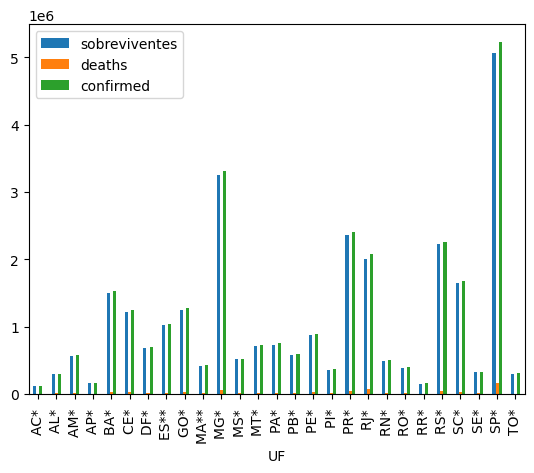

In [107]:
#Gerar um gráfico de barras
summary.plot.bar()

<AxesSubplot:xlabel='UF'>

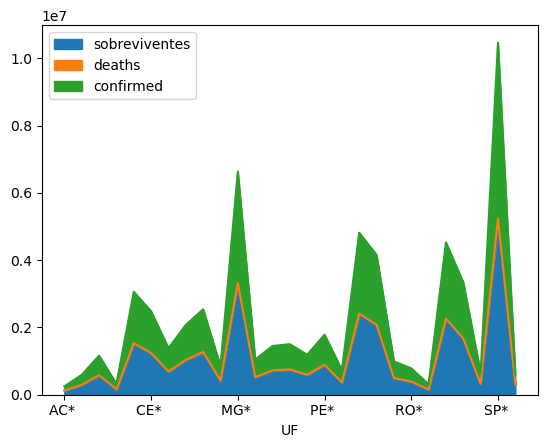

In [106]:
#Gerar um gráfico de área
summary.plot.area()

<AxesSubplot:ylabel='sobreviventes'>

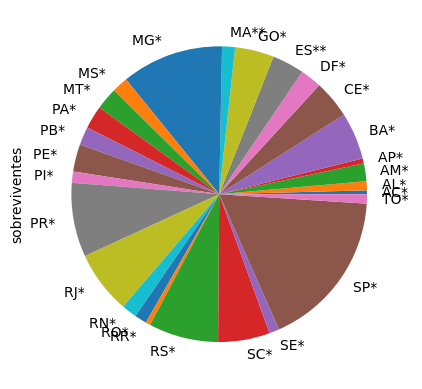

In [137]:
summary2 = Conjunto.groupby('UF')['sobreviventes'].sum()
summary2.plot.pie()